In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

from sklearn import datasets
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.metrics import PredictionErrorDisplay

import pandas as pd

In [27]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\GitHub\Data-mining-project\datasets\final_dataset.csv')
print(data.head())

   region  danceability  energy  key  loudness  mode  speechiness  \
0       3         0.685   0.644   10   -13.206     0       0.1550   
1       3         0.748   0.627    7    -6.029     1       0.0639   
2       3         0.509   0.803    0    -6.743     1       0.0400   
3       2         0.703   0.226    7   -13.457     1       0.0403   
4       2         0.472   0.349    1    -7.340     1       0.0346   

   acousticness  instrumentalness  liveness  valence    tempo  duration_ms  \
0         0.302          0.000055    0.1140    0.808  164.919       169379   
1         0.131          0.000000    0.0852    0.524  120.963       188491   
2         0.684          0.000539    0.4630    0.651  166.018       187119   
3         0.889          0.028400    0.0652    0.117  118.945       226387   
4         0.143          0.000063    0.0930    0.136  121.054       187000   

   time_signature  popular  
0               4        0  
1               4        0  
2               4        0  


In [28]:
feature_names = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 
                   'acousticness', 'instrumentalness', 'liveness', 'valence', 
                   'tempo', 'duration_ms', 'time_signature']


df = pd.DataFrame(data, columns=feature_names)
df['region'] = data.region
df['popular'] = data.popular
df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,region,popular
0,0.685,0.644,10,-13.206,0,0.1550,0.30200,0.000055,0.1140,0.8080,164.919,169379,4,3,0
1,0.748,0.627,7,-6.029,1,0.0639,0.13100,0.000000,0.0852,0.5240,120.963,188491,4,3,0
2,0.509,0.803,0,-6.743,1,0.0400,0.68400,0.000539,0.4630,0.6510,166.018,187119,4,3,0
3,0.703,0.226,7,-13.457,1,0.0403,0.88900,0.028400,0.0652,0.1170,118.945,226387,4,2,0
4,0.472,0.349,1,-7.340,1,0.0346,0.14300,0.000063,0.0930,0.1360,121.054,187000,4,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189292,0.637,0.741,9,-4.364,1,0.0300,0.20000,0.000000,0.1850,0.4190,89.982,241564,4,6,0
189293,0.674,0.590,6,-7.947,0,0.0325,0.60200,0.002100,0.1940,0.3960,133.953,218500,4,8,0
189294,0.819,0.679,11,-8.984,0,0.1040,0.35300,0.000000,0.2910,0.5510,139.983,208608,4,4,0
189295,0.689,0.743,11,-8.559,0,0.4980,0.09250,0.000000,0.0511,0.3490,141.728,207667,4,10,0


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189297 entries, 0 to 189296
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   region            189297 non-null  int64  
 1   danceability      189297 non-null  float64
 2   energy            189297 non-null  float64
 3   key               189297 non-null  int64  
 4   loudness          189297 non-null  float64
 5   mode              189297 non-null  int64  
 6   speechiness       189297 non-null  float64
 7   acousticness      189297 non-null  float64
 8   instrumentalness  189297 non-null  float64
 9   liveness          189297 non-null  float64
 10  valence           189297 non-null  float64
 11  tempo             189297 non-null  float64
 12  duration_ms       189297 non-null  int64  
 13  time_signature    189297 non-null  int64  
 14  popular           189297 non-null  int64  
dtypes: float64(9), int64(6)
memory usage: 21.7 MB


In [30]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
region,189297.0,5.571758,3.288120,0.0,3.0000,6.000000,9.000000,10.000
danceability,189297.0,0.649613,0.154390,0.0,0.5500,0.667000,0.764000,0.988
energy,189297.0,0.632489,0.195288,0.0,0.5100,0.652000,0.779000,1.000
key,189297.0,5.335055,3.604398,0.0,2.0000,6.000000,8.000000,11.000
loudness,189297.0,-7.405815,3.389996,-60.0,-8.8220,-6.818000,-5.249000,3.795
mode,189297.0,0.563068,0.496008,0.0,0.0000,1.000000,1.000000,1.000
speechiness,189297.0,0.118607,0.119773,0.0,0.0391,0.063700,0.157000,0.966
acousticness,189297.0,0.283864,0.275255,0.0,0.0511,0.189000,0.458000,0.996
instrumentalness,189297.0,0.049584,0.178130,0.0,0.0000,0.000002,0.000341,0.993
liveness,189297.0,0.179596,0.143091,0.0,0.0959,0.122000,0.216000,0.996


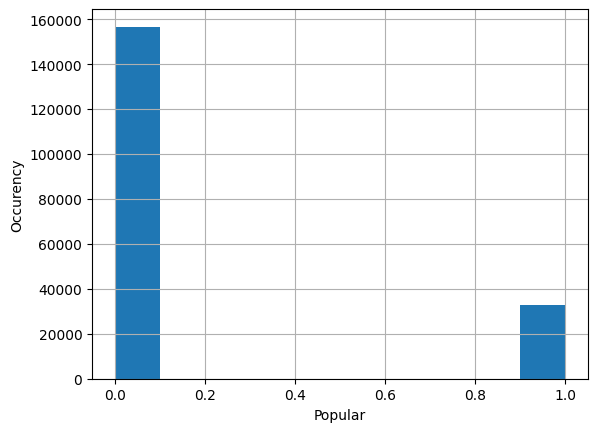

In [31]:
#distribution of popular and nonpopular songs
data['popular'].hist()
plt.xlabel('Popular')
plt.ylabel('Occurency')
plt.show()

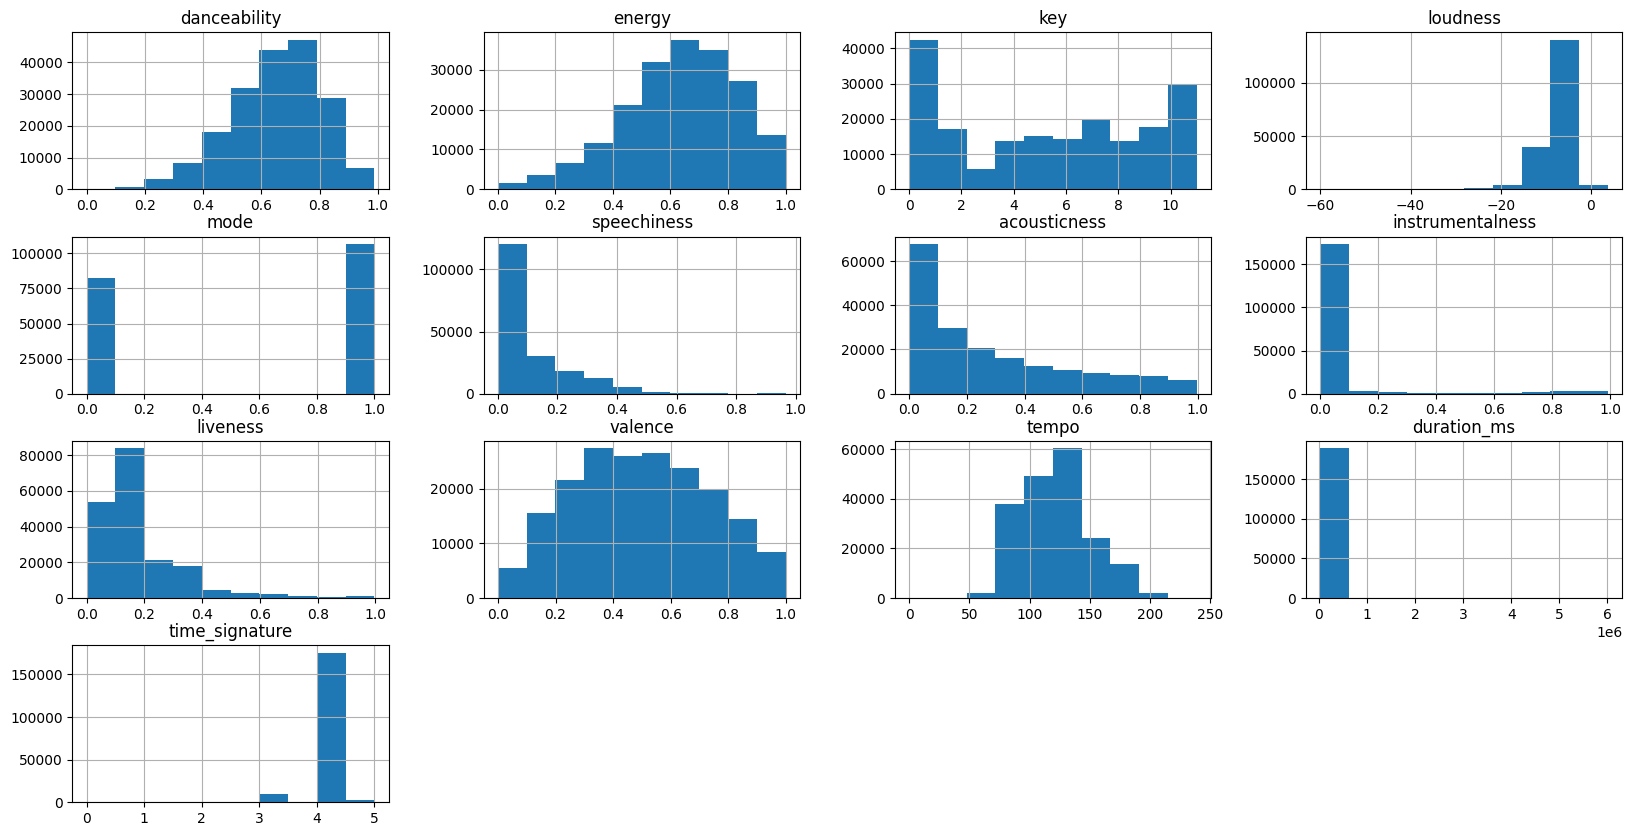

In [32]:
#distribution of each audio feature
df[feature_names].hist(bins =10, layout =None, figsize=(20,10))
plt.show()

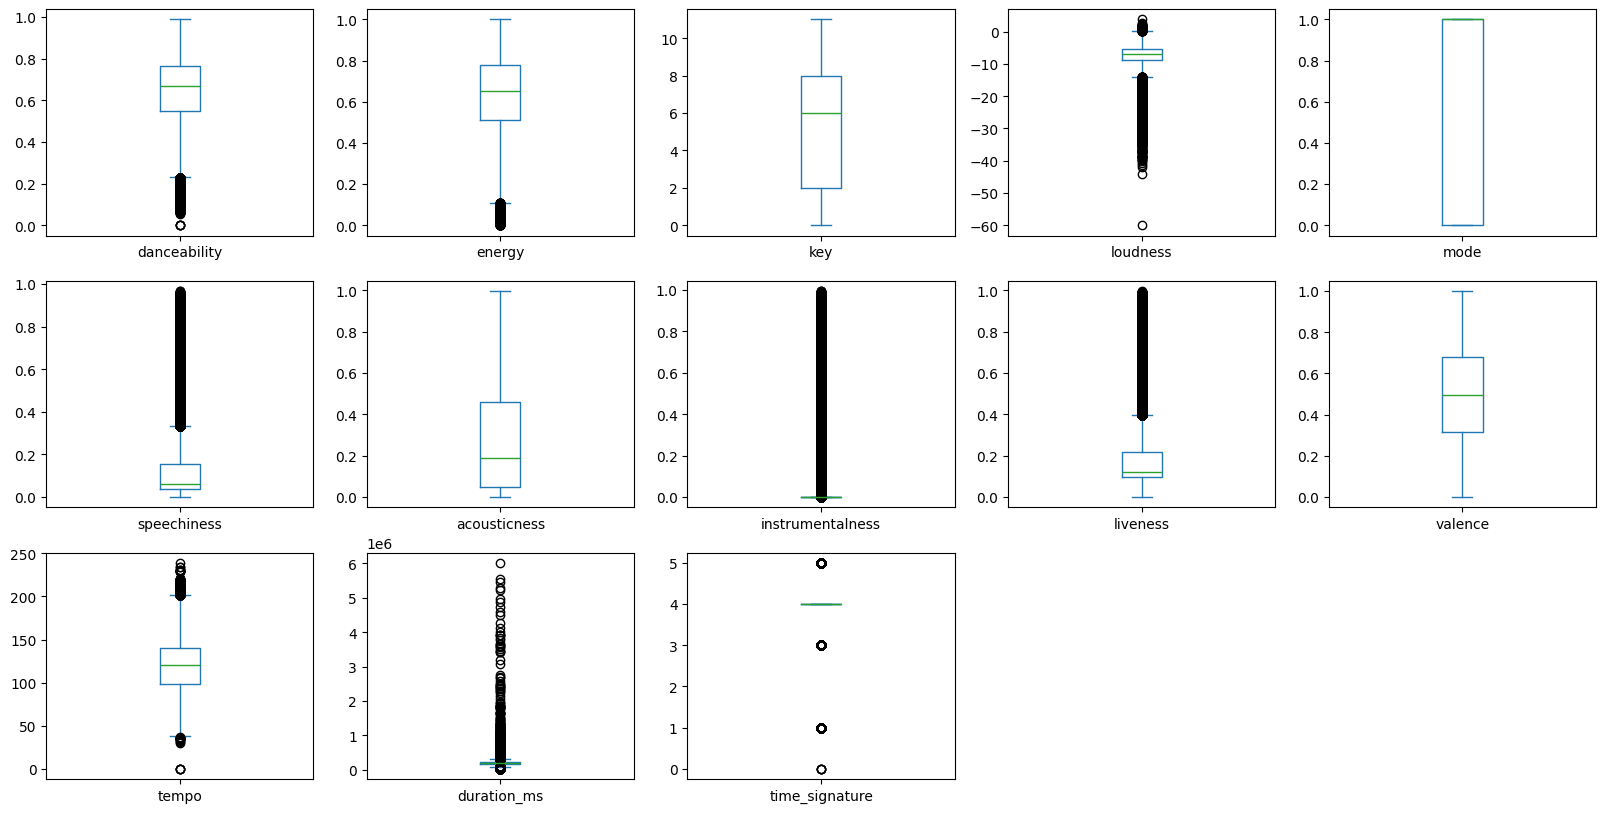

In [33]:
df[feature_names].plot(kind='box', subplots=True, figsize=(20,10), layout=(3,5))
plt.show()

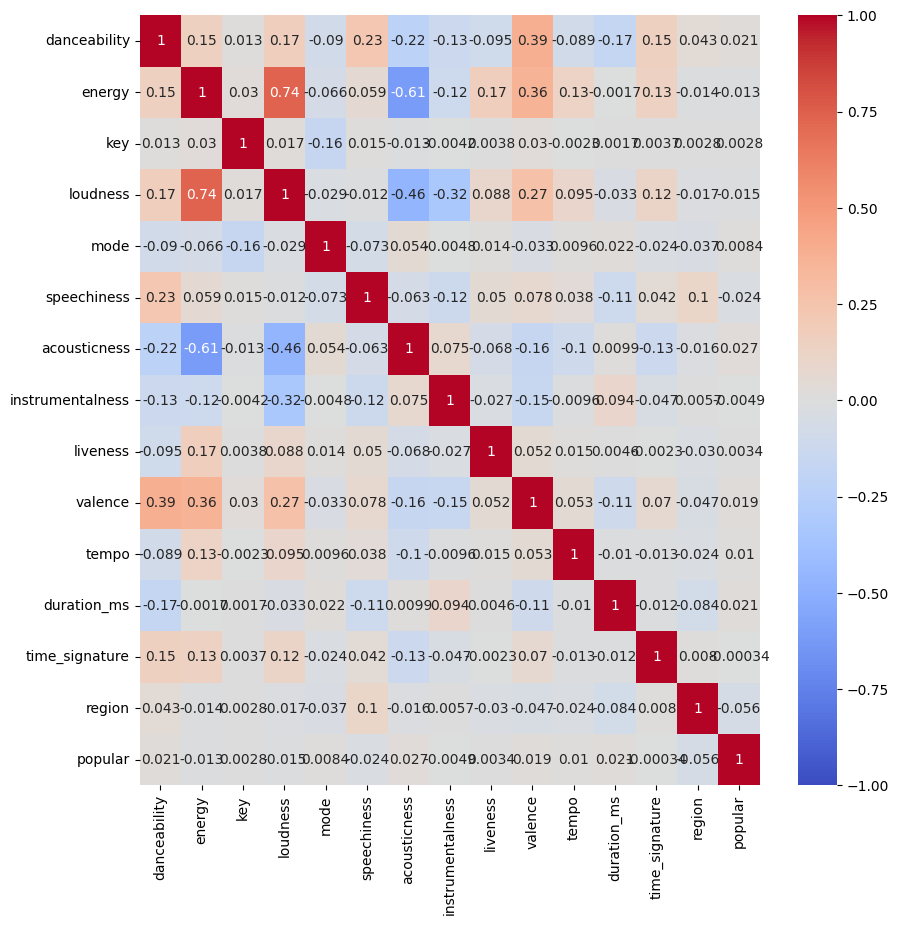

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap = "coolwarm")
plt.show()

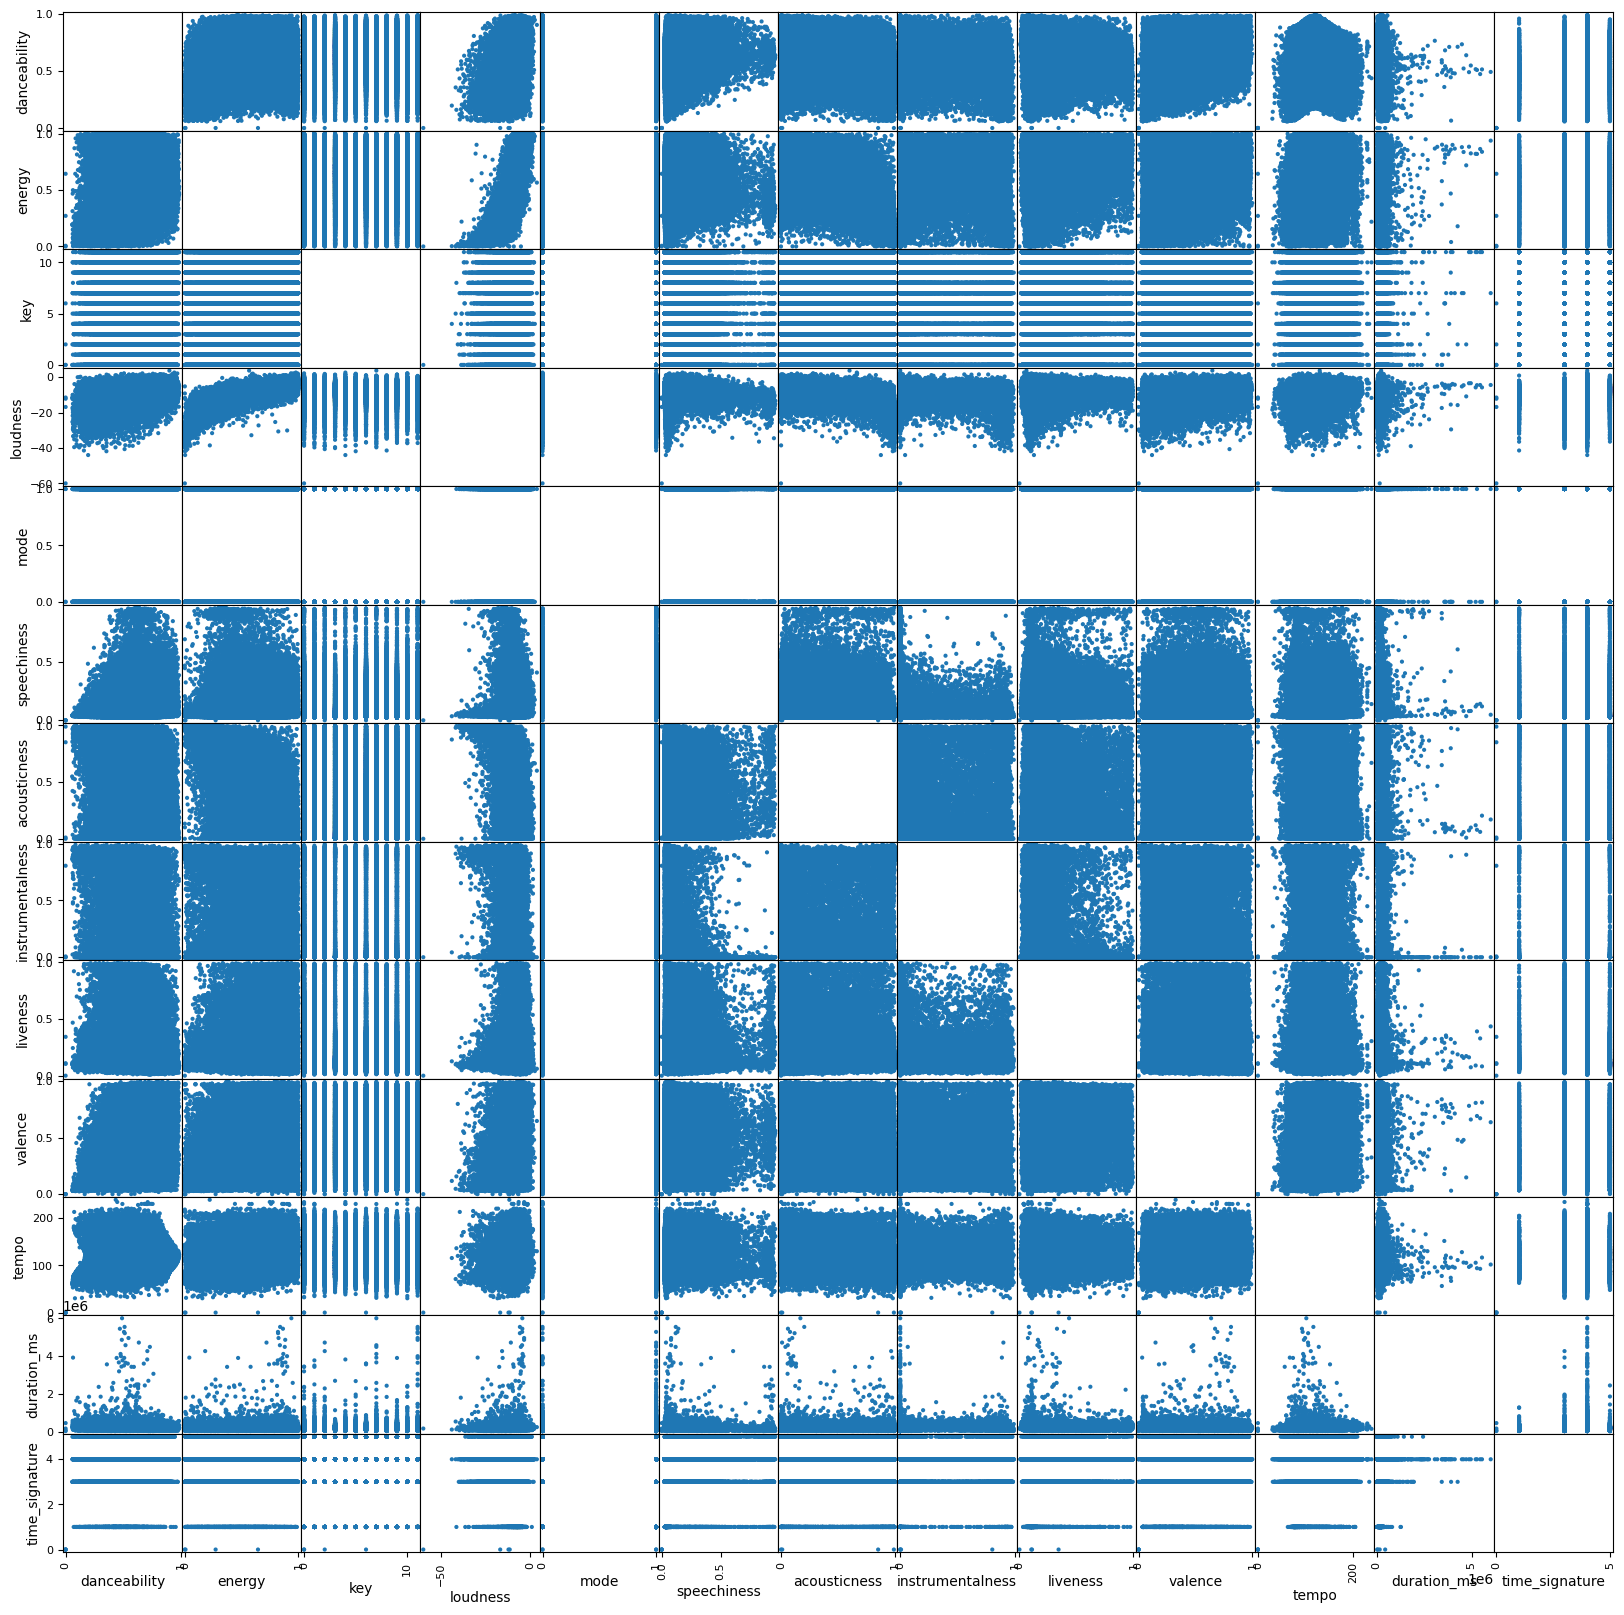

In [35]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[[x for x in feature_names]],
                    figsize=(20,20),
                    alpha=1,
                    diagonal=1)
plt.show()

In [36]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


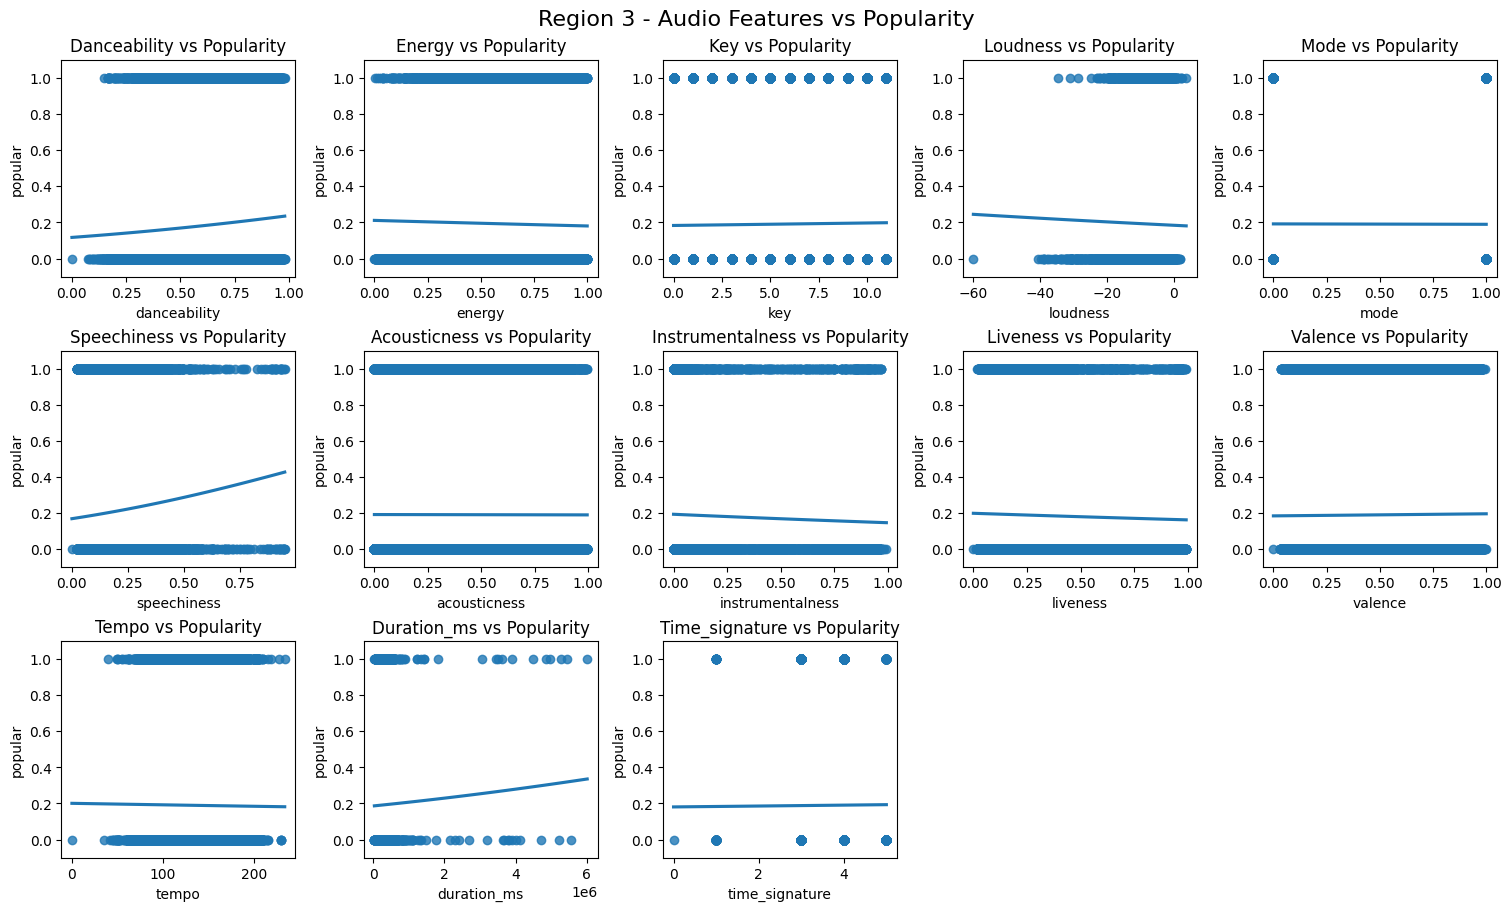

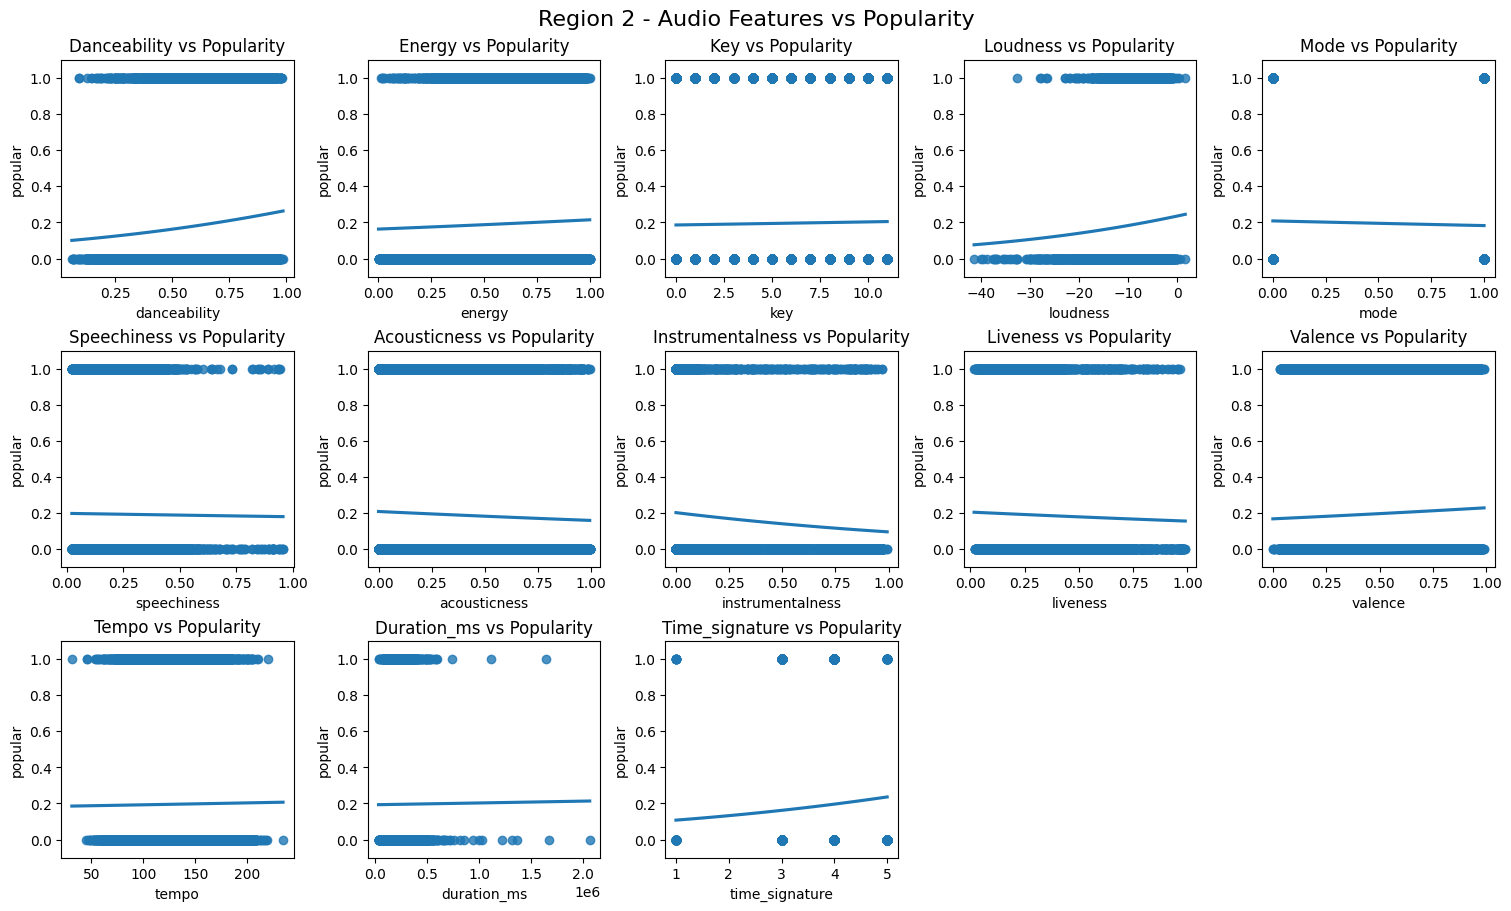

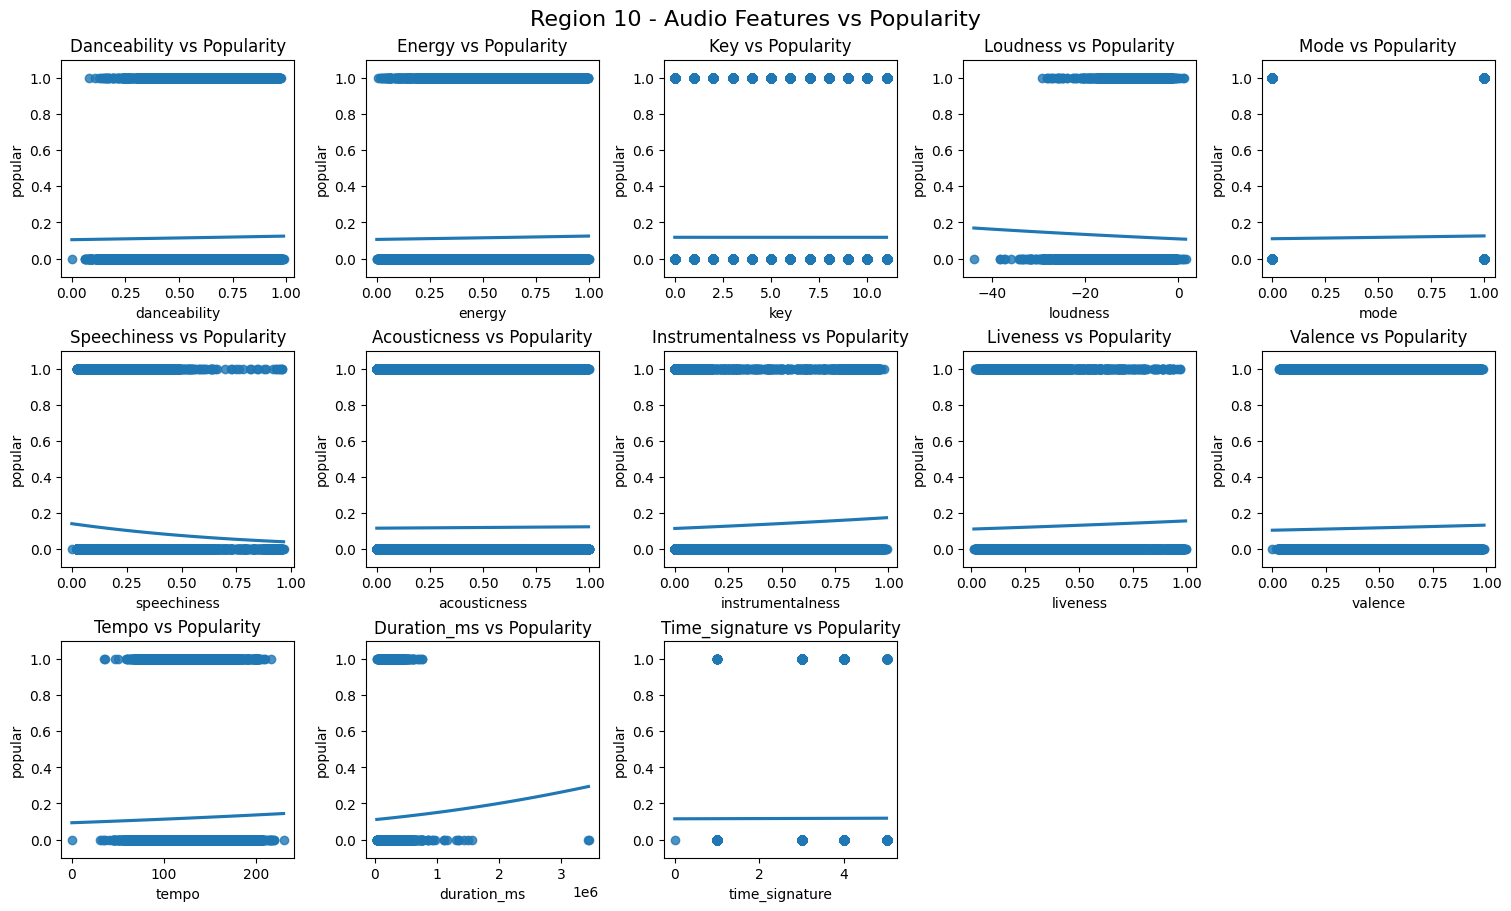

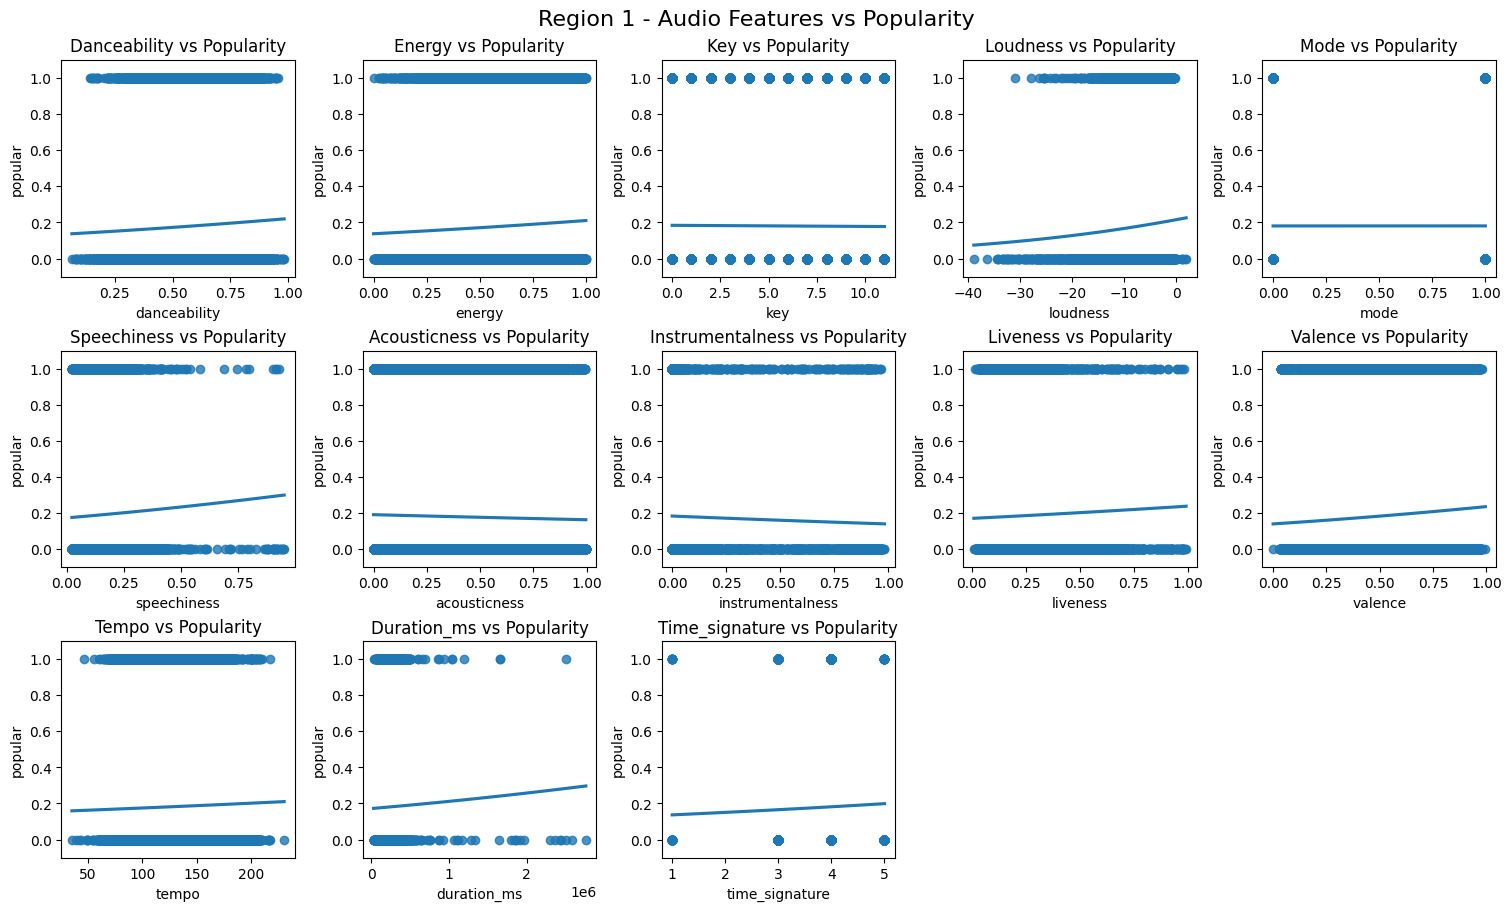

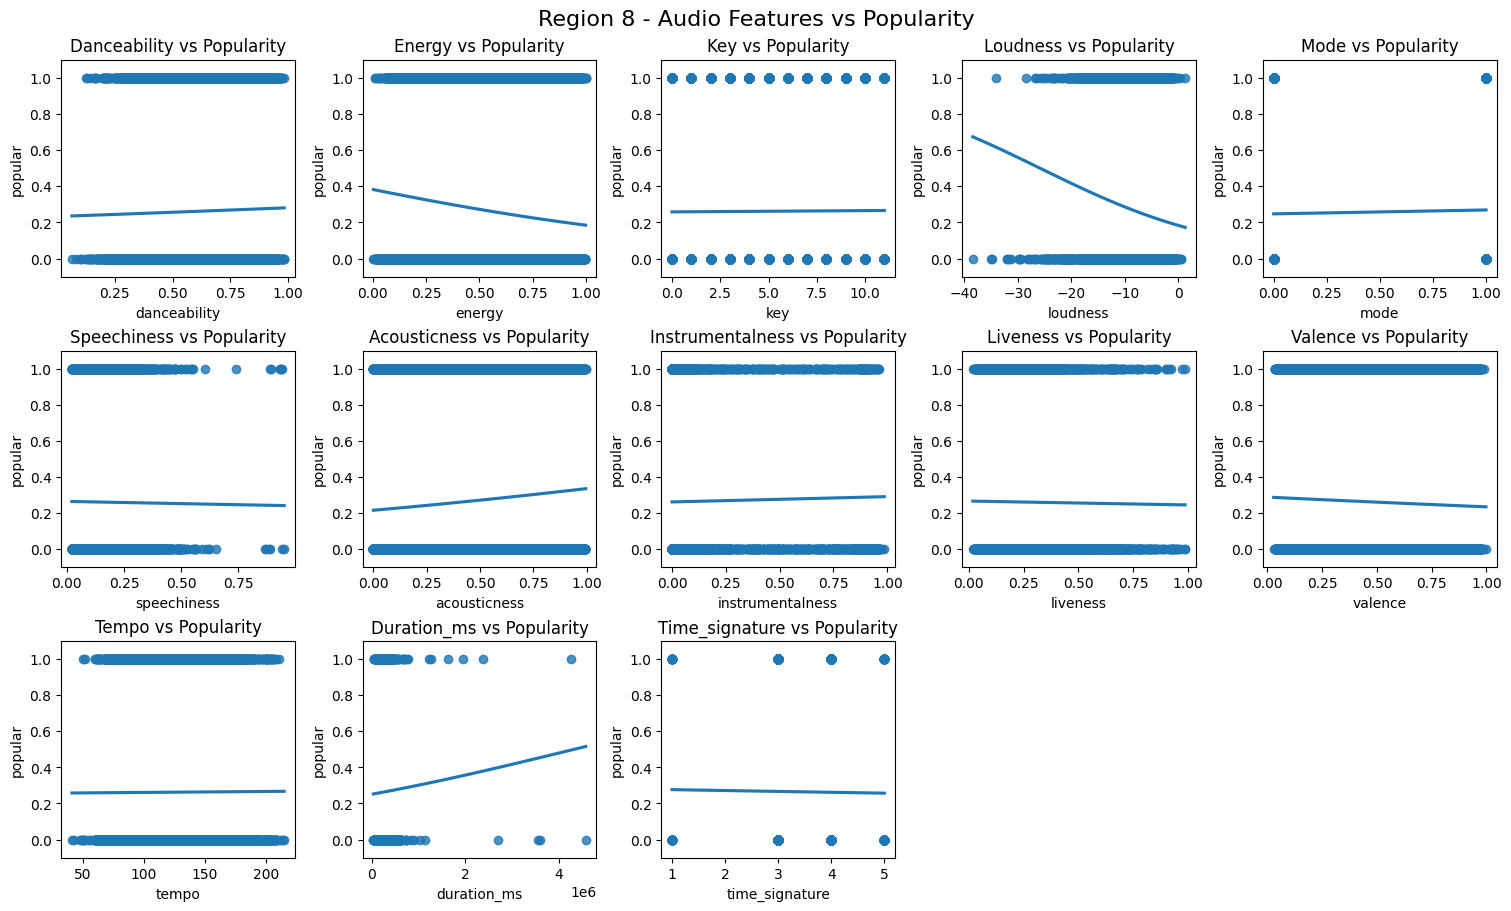

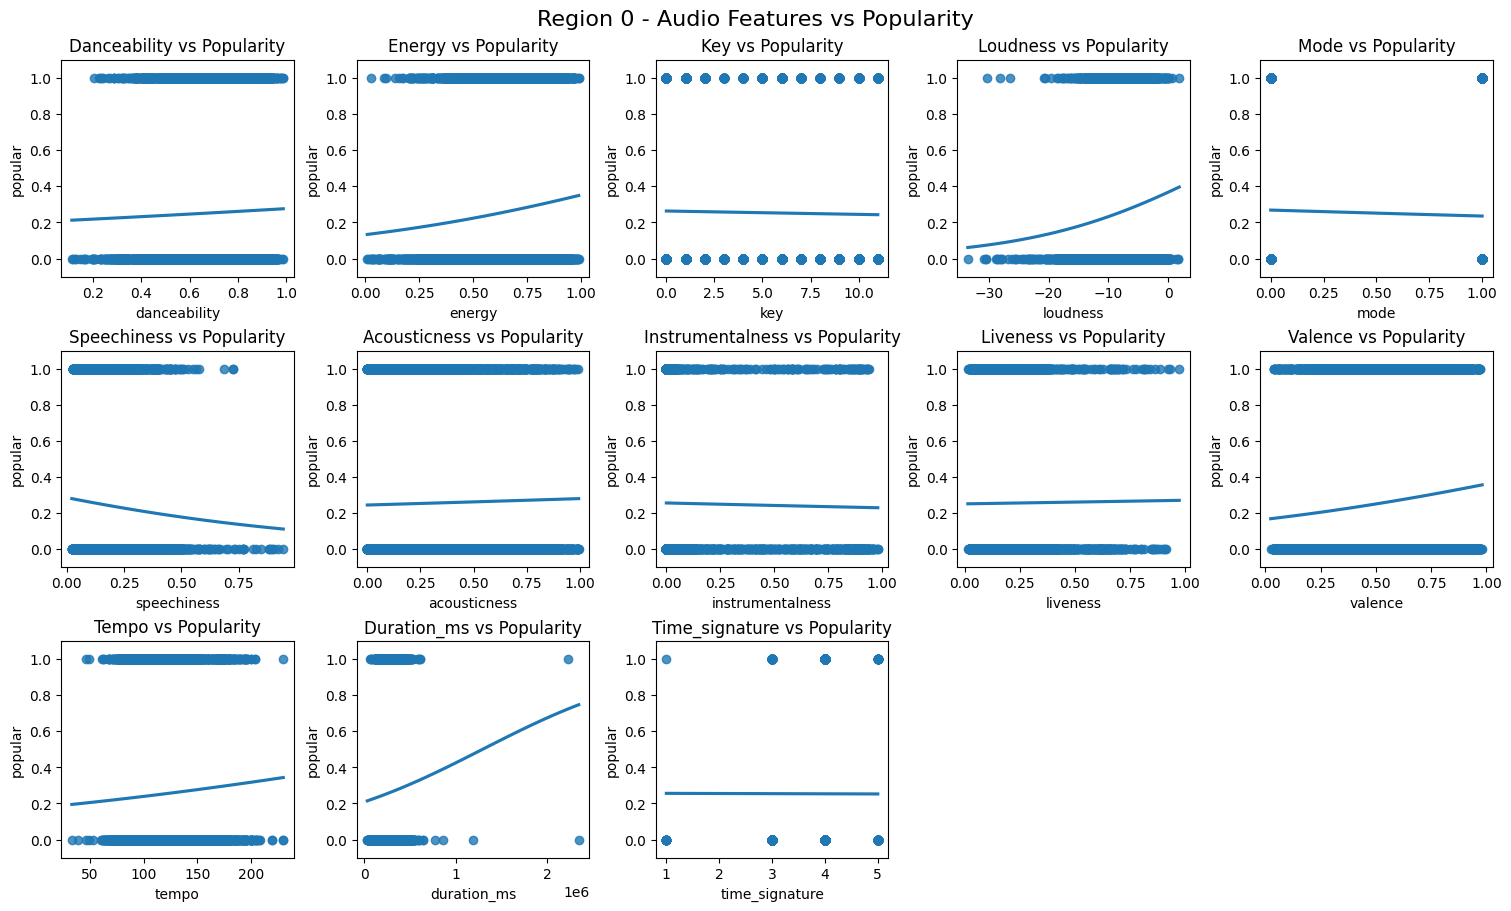

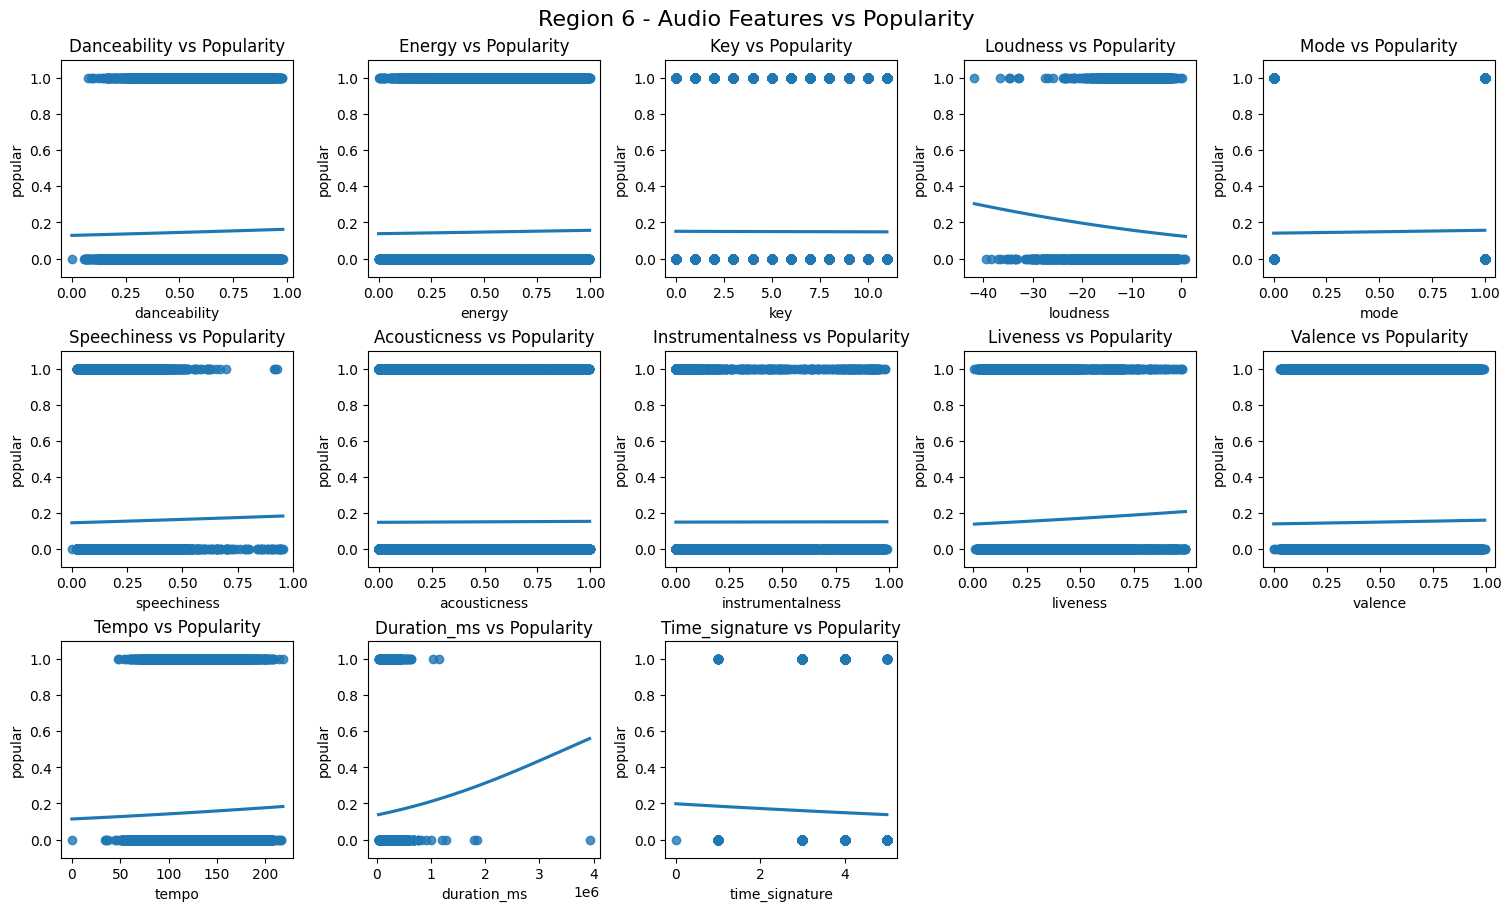

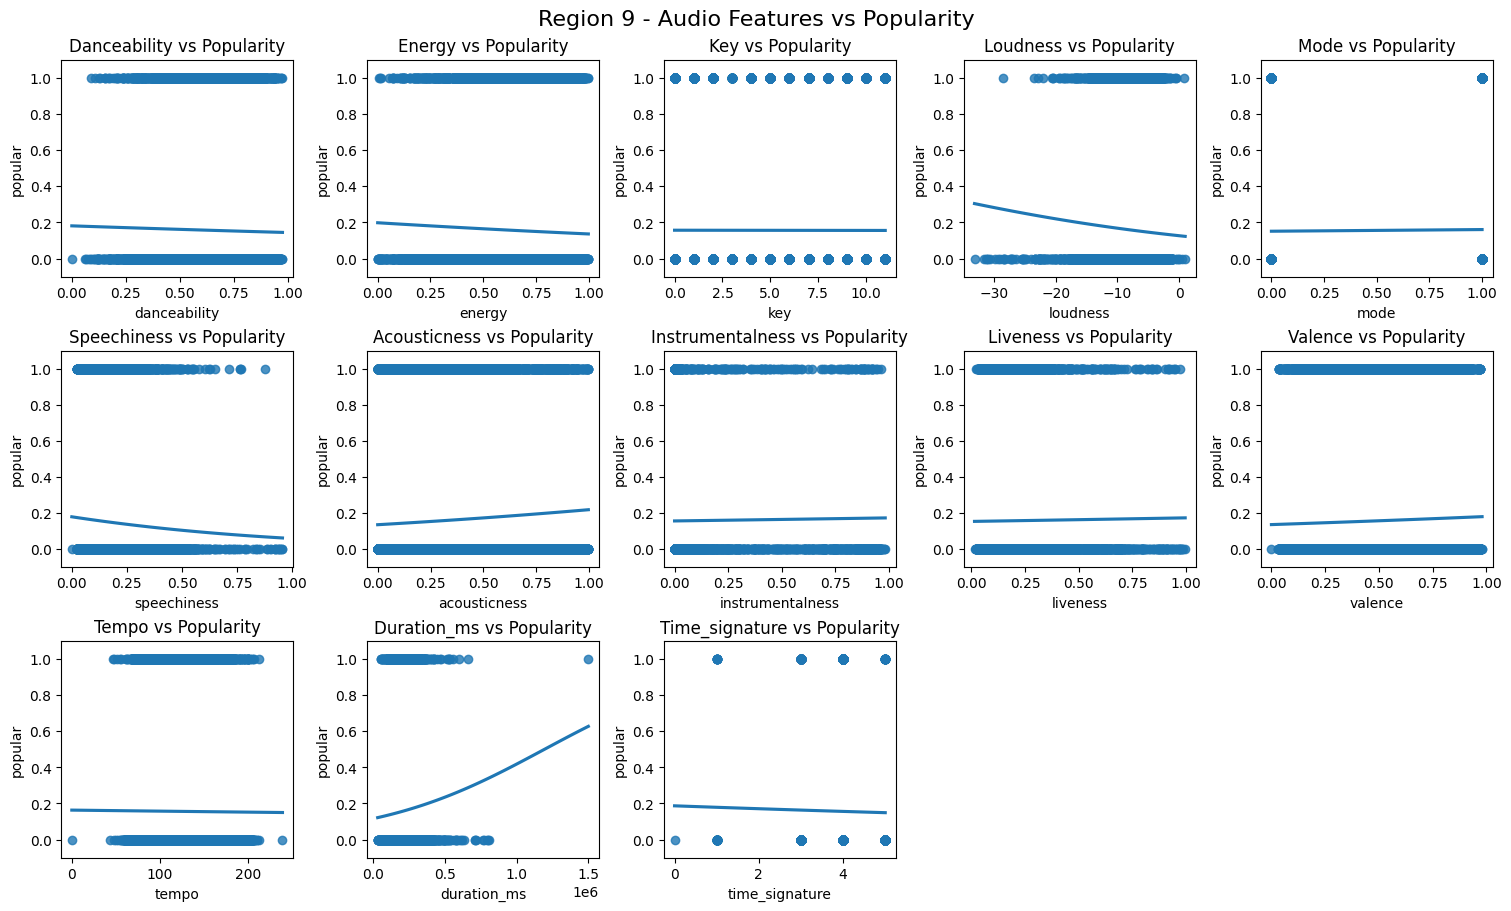

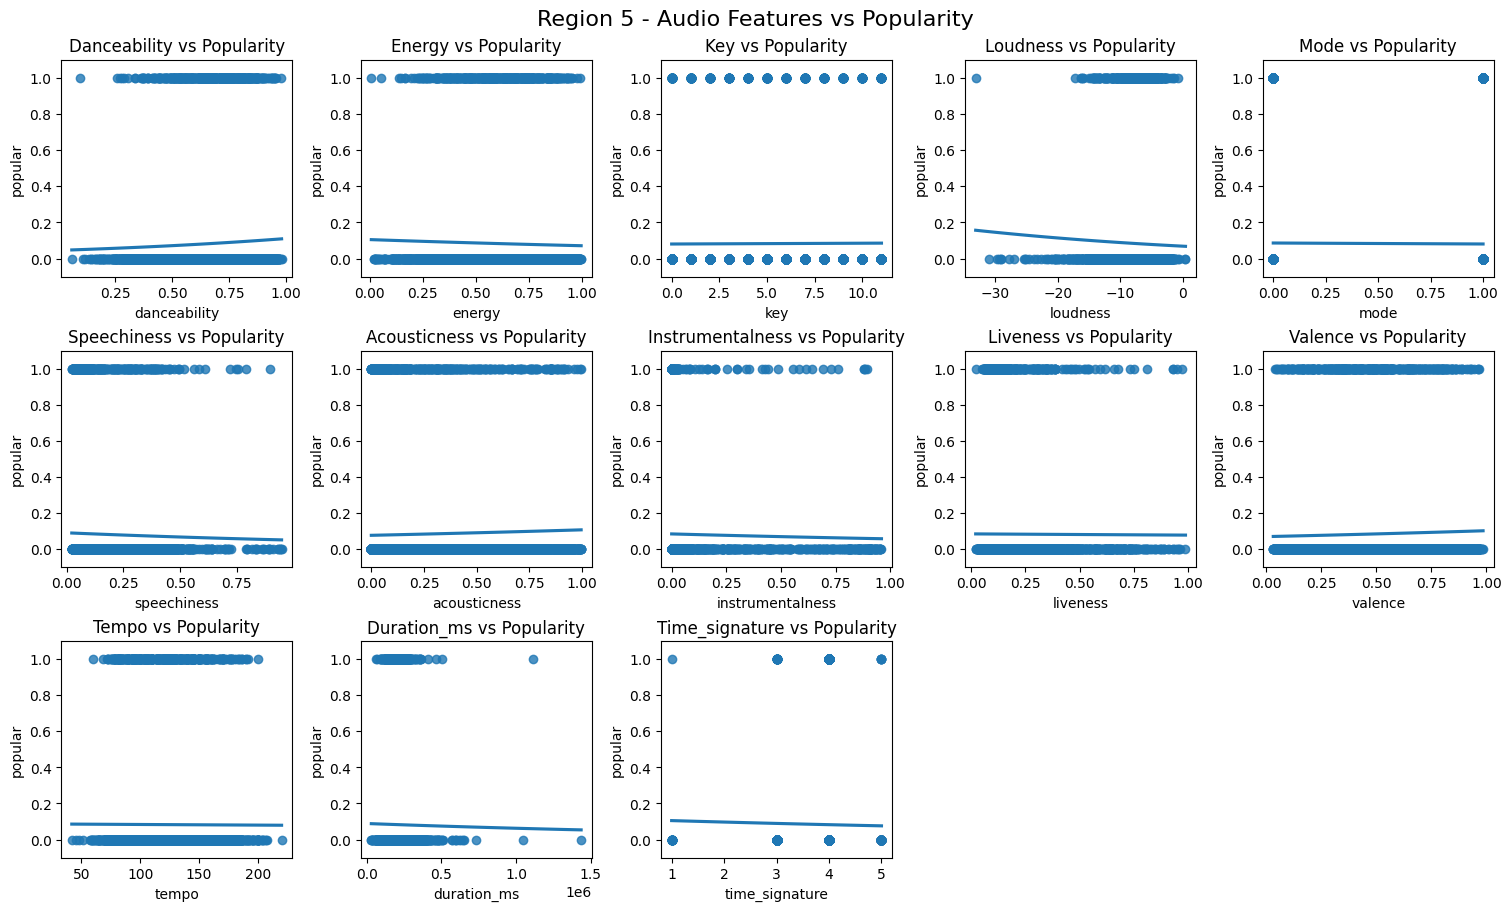

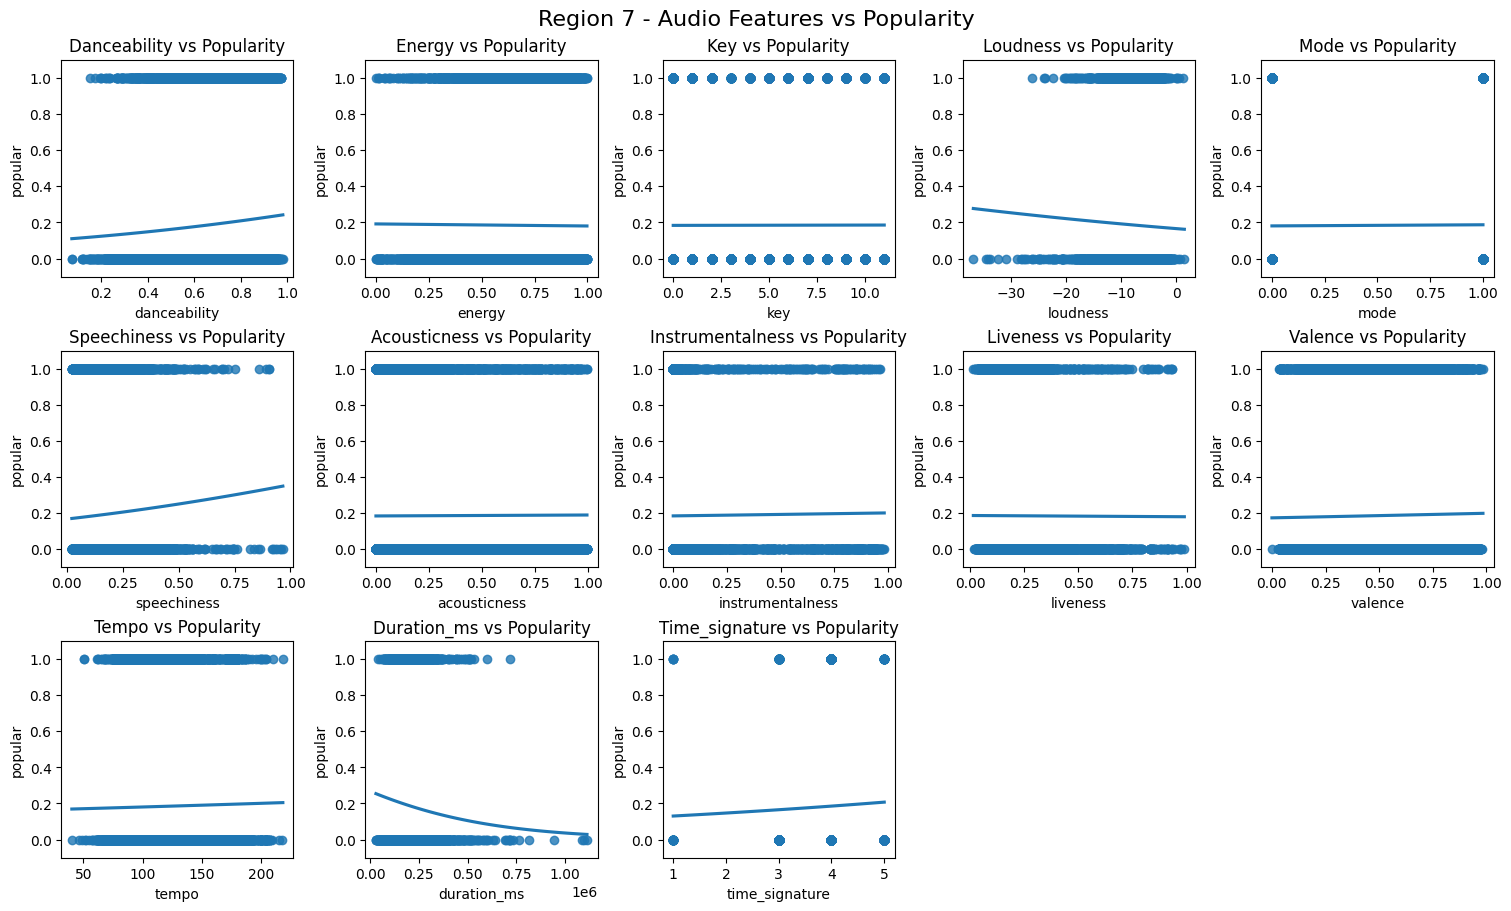

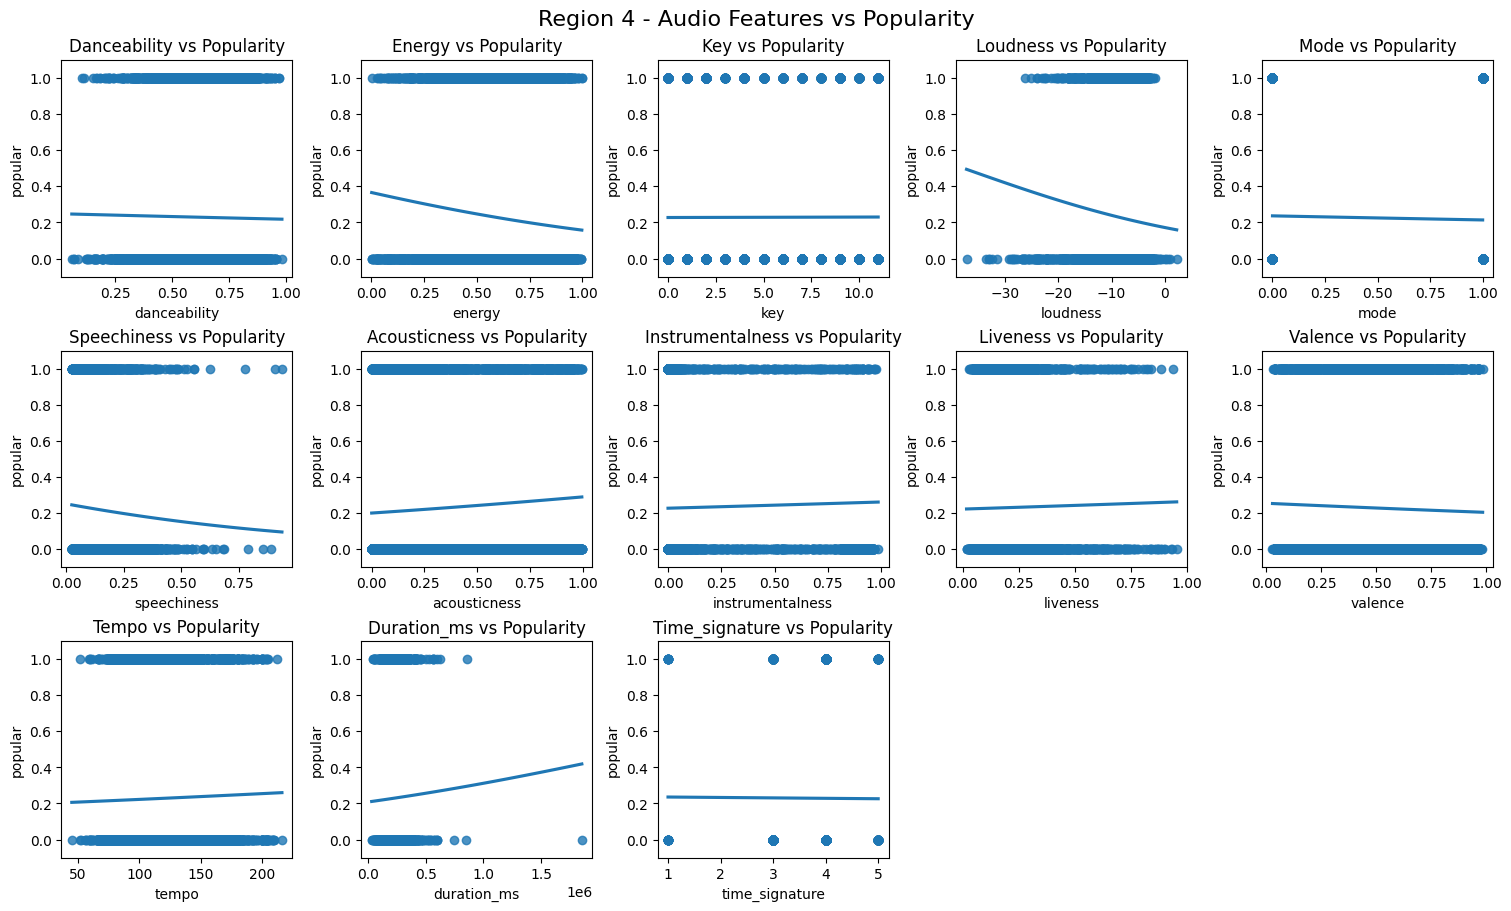

In [37]:
num_cols= 5

for region in data['region'].unique():
    region_data = data[data['region'] == region]

    num_rows = (len(feature_names) + num_cols - 1) // num_cols  # Ceiling division

    # Create subplots: adjust figure size for smaller graphs
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3), constrained_layout=True)
    fig.suptitle(f'Region {region} - Audio Features vs Popularity', fontsize=16)
    
    # Flatten the axes array for easier access
    axes = axes.flatten()
    
    # Plot each feature
    for i, feature in enumerate(feature_names):
        sns.regplot(x=feature, y='popular', data=region_data, logistic=True, ci=None, ax=axes[i])
        axes[i].set_title(f'{feature.capitalize()} vs Popularity')
        axes[i].set_ylim(-0.1, 1.1)
    
    # Remove unused subplots if the number of features is less than the grid size
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Analyze logistic regression coefficients for each region
for region in data['region'].unique():
    region_data = data[data['region'] == region]  # Subset data for this region
    
    # Features and target
    X_region = region_data.drop(columns=['popular'])
    y_region = region_data['popular']
    
    # Standardize features
    scaler_region = StandardScaler()
    X_region_scaled = scaler_region.fit_transform(X_region)
    
    # Train logistic regression model
    log_reg_region = LogisticRegression(max_iter=1000)
    log_reg_region.fit(X_region_scaled, y_region)
    
    # Get feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'Feature': X_region.columns,
        'Coefficient': log_reg_region.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)
    
    print(f'\nRegion {region} - Feature Importance:')
    print(feature_importance)



Region 3 - Feature Importance:
             Feature  Coefficient
6        speechiness     0.126113
1       danceability     0.114815
12       duration_ms     0.033956
3                key     0.029528
5               mode     0.013537
0             region     0.000000
11             tempo    -0.002529
13    time_signature    -0.013154
7       acousticness    -0.014740
10           valence    -0.017062
9           liveness    -0.028000
2             energy    -0.031522
4           loudness    -0.038303
8   instrumentalness    -0.049063

Region 2 - Feature Importance:
             Feature  Coefficient
1       danceability     0.180996
12       duration_ms     0.049475
4           loudness     0.032368
13    time_signature     0.031924
11             tempo     0.029475
3                key     0.021125
10           valence     0.017245
0             region     0.000000
2             energy    -0.011725
7       acousticness    -0.028572
9           liveness    -0.037462
5               mo

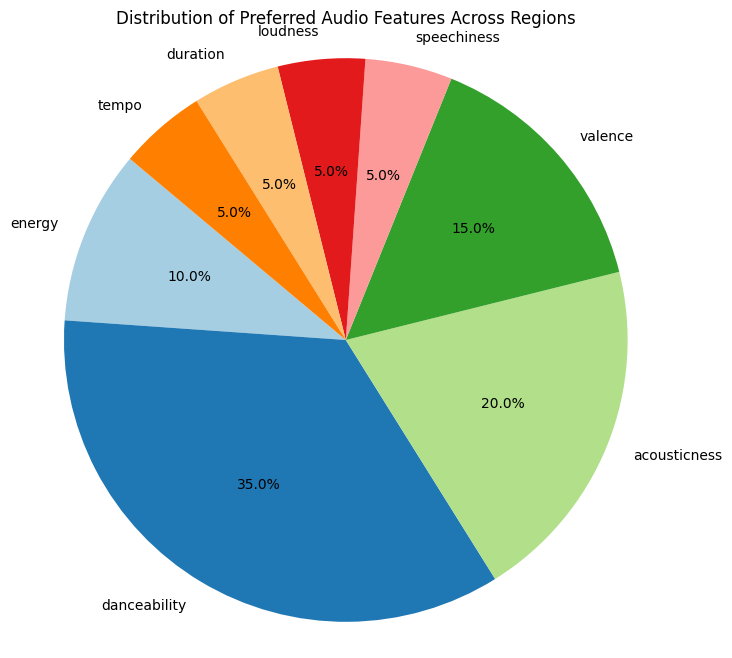

In [1]:
import matplotlib.pyplot as plt

# Define the regions and their preferred features
region_preferences = {
    'Northern Europe': ['energy', 'danceability'],
    'Southern Europe': ['acousticness', 'valence'],
    'Eastern Europe': ['danceability'],
    'North America': ['danceability', 'acousticness'],
    'Latin America': ['speechiness', 'danceability'],
    'Oceania': ['danceability', 'energy'],
    'East Asia': ['valence'],
    'South Asia': ['danceability', 'acousticness'],
    'Middle East': ['danceability'],
    'Africa': ['loudness', 'valence', 'acousticness', 'duration', 'tempo']
}

# Count how often each feature is preferred across all regions
feature_counts = {}
for features in region_preferences.values():
    for feature in features:
        if feature in feature_counts:
            feature_counts[feature] += 1
        else:
            feature_counts[feature] = 1

# Prepare data for the pie chart
labels = list(feature_counts.keys())
sizes = list(feature_counts.values())

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Add a title
plt.title('Distribution of Preferred Audio Features Across Regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


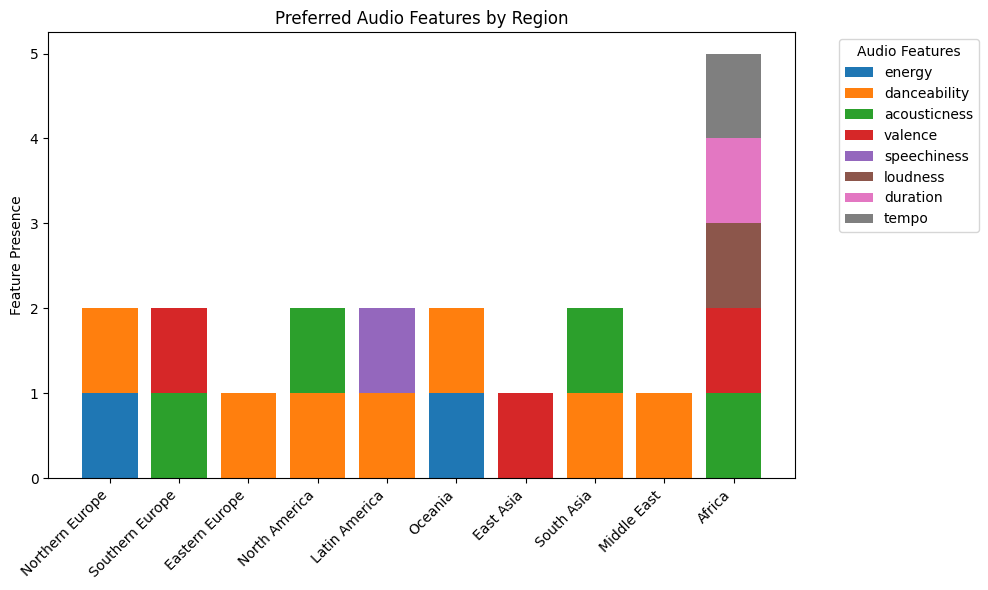

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Define the regions and their preferred features
region_preferences = {
    'Northern Europe': ['energy', 'danceability'],
    'Southern Europe': ['acousticness', 'valence'],
    'Eastern Europe': ['danceability'],
    'North America': ['danceability', 'acousticness'],
    'Latin America': ['speechiness', 'danceability'],
    'Oceania': ['danceability', 'energy'],
    'East Asia': ['valence'],
    'South Asia': ['danceability', 'acousticness'],
    'Middle East': ['danceability'],
    'Africa': ['loudness', 'valence', 'acousticness', 'duration', 'tempo']
}

# List of all unique features
all_features = ['energy', 'danceability', 'acousticness', 'valence', 'speechiness', 'loudness', 'duration', 'tempo']

# Initialize a matrix with zeros (regions x features)
region_names = list(region_preferences.keys())
num_regions = len(region_names)
num_features = len(all_features)
feature_matrix = np.zeros((num_regions, num_features))

# Fill the matrix: 1 if the feature is preferred in the region, 0 otherwise
for i, region in enumerate(region_names):
    for feature in region_preferences[region]:
        feature_index = all_features.index(feature)
        feature_matrix[i, feature_index] = 1

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Stacked bar plot for each feature
for j, feature in enumerate(all_features):
    ax.bar(region_names, feature_matrix[:, j], label=feature, bottom=np.sum(feature_matrix[:, :j], axis=1))

# Customizing the plot
ax.set_ylabel('Feature Presence')
ax.set_title('Preferred Audio Features by Region')
plt.xticks(rotation=45, ha="right")
ax.legend(title="Audio Features", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
